#### 필요 모듈 불러오기

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt

#### 가상 데이터 생성

In [7]:
# X: 0~1사이의 난수 + 1~2사이의 난수 + 2~3사이의 난수
X = np.random.random(size=10).tolist() + (np.random.random(size=10)+1).tolist() + (np.random.random(size=10)+2).tolist()
Y = [0]*9 + [1]*1 + [0]*2 + [1]*8 + [0]*9 + [1]*1

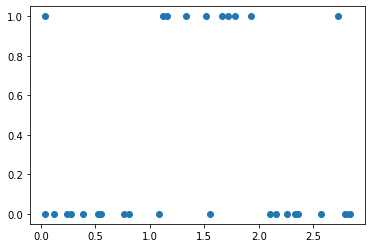

In [8]:
plt.scatter(X,Y)

# 0~1, 2~3 사이는 y=0이 많고
# 1~2 사이는 y=1이 많다

In [9]:
X = np.array(X)
Y = np.array(Y)

# np.logical_and: 둘 다 True=>True 반환, 둘 중에 하나라도 False=>False 반환
cond = np.logical_and(X>1, X<=2) 

# X_tilda = X => 사본이 아니라 view를 반환하기 때문 
X_tilda = X.copy()
X_tilda[cond] = 1
X_tilda[~cond] = 0

In [10]:
X_tilda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 모델 학습

In [11]:
# X는 1차원이어서 sklearn의 인풋 구조와 맞지 않아, reshape를 사용함

model_1 = LR().fit(X.reshape(-1, 1), Y) # model_1: X를 특징을 그대로 사용한 모델
model_2 = LR().fit(X_tilda.reshape(-1, 1), Y) # model_2: 변환한 특징을 사용한 모델

#### 결과 시각화 

In [12]:
%matplotlib inline

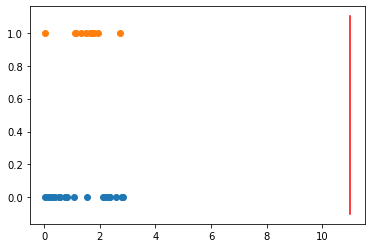

In [15]:
# decision boundary 유도
# Pr(y = 1 | x) >= 0.5
# <=> 1 / (1 + exp(-coef * x - intercept)) >= 0.5
# <=> (1 + exp(-coef * x - intercept)) <= 2
# <=> exp(-coef * x - intercept) <= 1
# <=> -coef * x - intercept <= 0
# <=> x >= - intercept / coef (유도된 결과)

decision_boundary = (-model_1.intercept_[0] / model_1.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color='red')
plt.scatter(X[Y==0], Y[Y==0])
plt.scatter(X[Y==1], Y[Y==1])

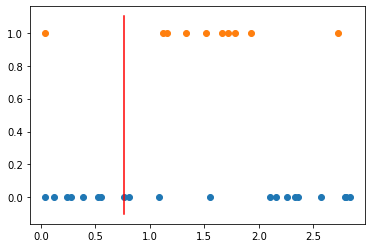

In [14]:
decision_boundary = (- model_2.intercept_[0] / model_2.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color='red')
plt.scatter(X[Y==0], Y[Y==0])
plt.scatter(X[Y==1], Y[Y==1])